# Модель Кронига-Пенни

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from sympy.interactive import printing
from scipy import constants
from scipy.linalg import eigh_tridiagonal

printing.init_printing(use_latex=True)

Модель Кронига-Пенни представляется в виде

$$
V(x) = 
\begin{cases}
    U,nc + a < x < (n + 1)c   \text{- первая область}\\ 
    0, nc < x < nc + a  \text{- вторая область}
\end{cases}
$$, где a - ширина ямы, с - постоянная кристалилической решетки, n = 0, $\pm 1,  \pm 2 \dots$

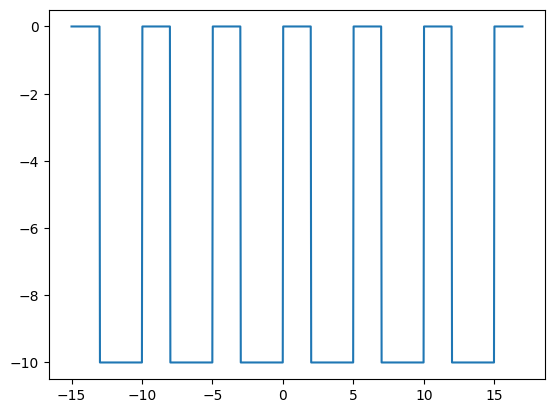

In [2]:
def V(U, x, a, c):
    n = x // c
    #print(n, x, n*c + a, (n+1)*c)
    if n*c + a < x <= (n + 1)*c:
        return U
    else: # n*c <= x < n*c + a:
        return 0

def plot_well(a, c, U):
    x = np.linspace(-3*c, 3*c + a, int(1e3))
    y = [V(U, i, a, c) for i in x]
    plt.plot(x, y)
    plt.show()

plot_well(2, 5, -10)

Данная модель описывается при помощи уравнения Кронига-Пенни

$$\cos{kb} = {{P}\over {b \alpha}} \sin{b \alpha} + \cos{b \alpha}$$
где $$\alpha = \sqrt { {2mE} \over {\hbar^2}} , P = {{mcUb} \over {\alpha \hbar^2} }, k - \text{волновое число}$$


In [3]:
def func(P, ba):
    return P * math.sin(ba) / ba + math.cos(ba)

In [4]:
def get_kronig_penny(P, a = -30, b = 30):
    dx = 1e-3
    x = np.arange(a, b, dx)
    y = [func(P, xx) for xx in x ]
    zones = [-1 < yy and yy <= 1 for yy in y]
    zones 
    return x, y, zones

In [5]:
def plot_kronig_penny(P, a = -30, b = 30):
    dx = 1e-2
    x, y, zones =  get_kronig_penny(P, a, b)
    plt.plot(x, y)
    plt.fill_between(x, -1, 1, where=zones, color="violet", alpha=0.5)
    plt.grid()
    plt.plot(x, [1] * len(x), linestyle = '--', color="red")
    plt.plot(x, [-1] * len(x), linestyle = '--', color="red")
    plt.show()
    

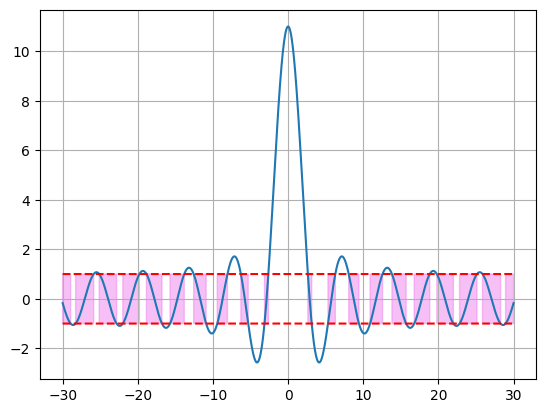

In [6]:
plot_kronig_penny(10)

Крайние случаи: $p = 0$ и $ p \rightarrow \infty$

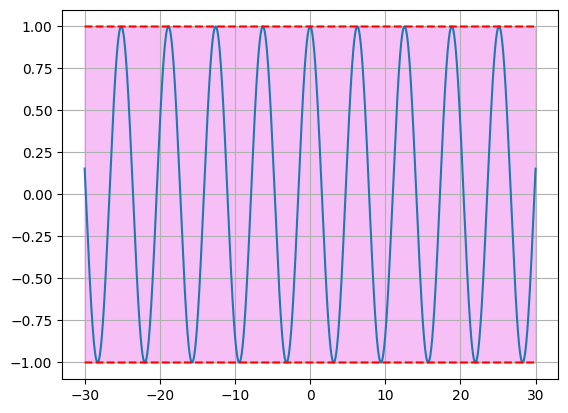

In [7]:
plot_kronig_penny(0)

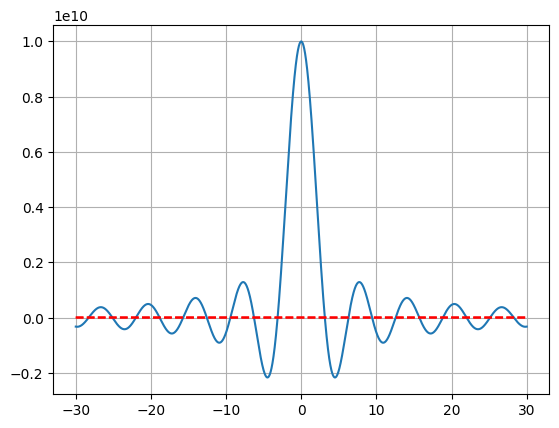

In [8]:
plot_kronig_penny(1e10)

In [9]:
from numpy import abs,arccos,linspace,array,pi
from cmath import sqrt,sin,cos,cosh,sinh
#from scipy import real_if_close
import matplotlib.pyplot as plt
#from ipywidgets import interact
%matplotlib inline

h = constants.hbar
charge = constants.elementary_charge
m = constants.electron_mass 


In [10]:
h = 6.58211928e-16
m = 9.10938291e-31


def right(E, P):
    alpha = np.sqrt(2 * m * E)/h
    return (P / alpha)*np.sin(alpha) + np.cos(alpha)    
    
def kronig_penney(P):
    E = np.linspace(0, 40, int(1e7))
    plt.figure(figsize=(10, 5))
    
    x_free, x = np.arccos(right(E, 0)), np.arccos(right(E, P))
    #x_free, x = x_free / np.pi, x / np.pi
    y = E
    
    plt.xlim([-math.pi, math.pi])
    plt.xlabel('kb')
    plt.ylabel('E(eV)')

    plt.fill_betweenx(y, -np.pi, np.pi, where=[abs(i) < np.pi for i in x], color="violet", alpha=0.5)

    plt.plot(x, y, 'b-')
    plt.plot(x_free, y, 'r--', alpha=0.7)
    plt.plot(-x, y, 'b-')
    plt.plot(-x_free, y, 'r--', alpha=0.7)

    plt.suptitle('P = %1.1f'% P)


/tmp/ipykernel_2447388/3914932297.py:7: RuntimeWarning: invalid value encountered in divide
  return (P / alpha)*np.sin(alpha) + np.cos(alpha)
/tmp/ipykernel_2447388/3914932297.py:7: RuntimeWarning: divide by zero encountered in divide
  return (P / alpha)*np.sin(alpha) + np.cos(alpha)
/tmp/ipykernel_2447388/3914932297.py:7: RuntimeWarning: invalid value encountered in multiply
  return (P / alpha)*np.sin(alpha) + np.cos(alpha)
/tmp/ipykernel_2447388/3914932297.py:13: RuntimeWarning: invalid value encountered in arccos
  x_free, x = np.arccos(right(E, 0)), np.arccos(right(E, P))


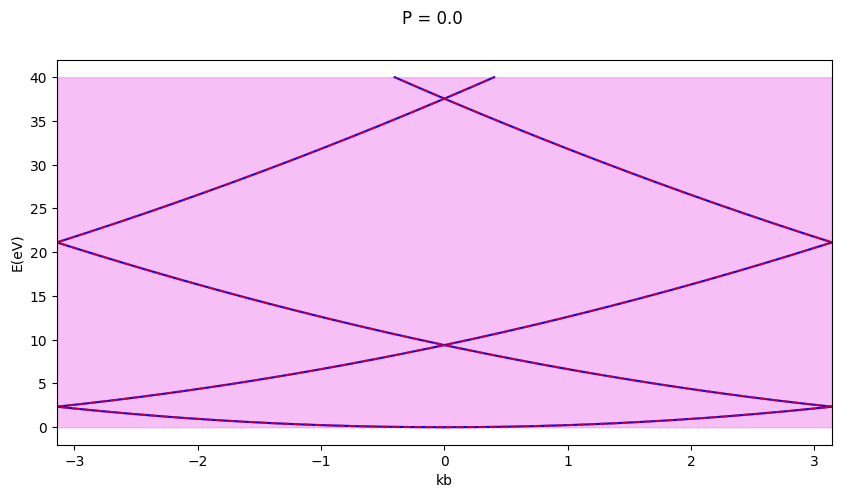

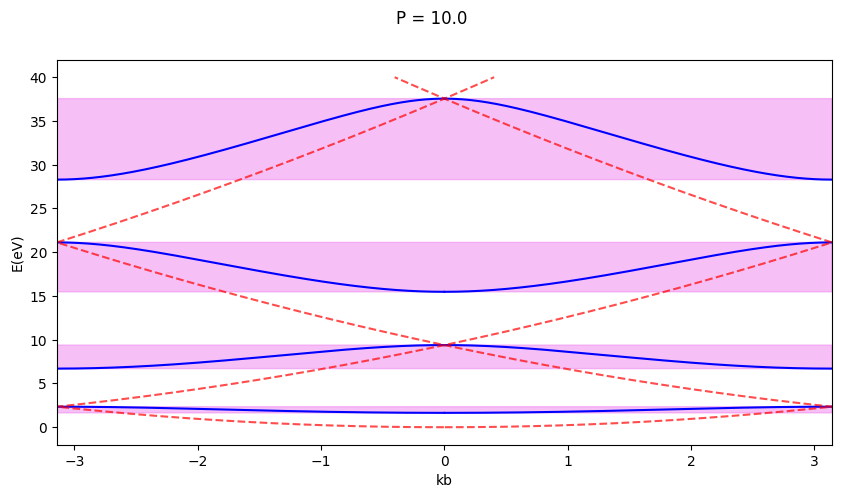

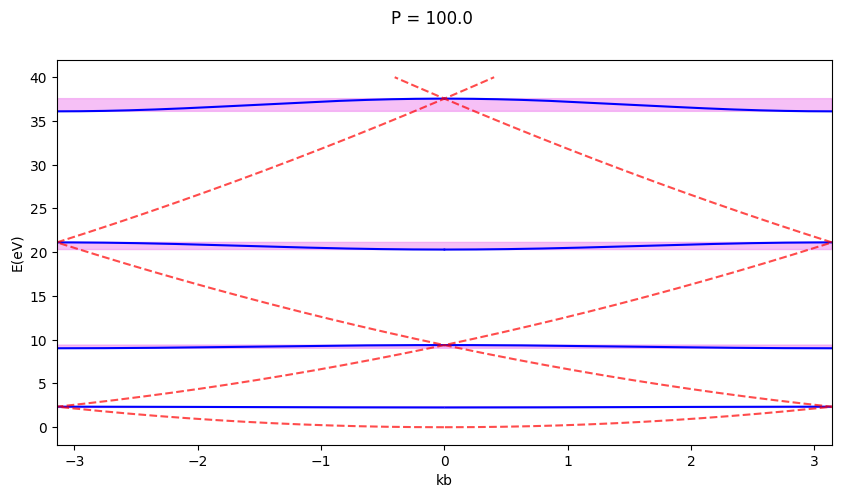

In [11]:
kronig_penney(0)
kronig_penney(10)
kronig_penney(100)

In [12]:
import gc
gc.collect()